In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import pandas as pd
import astropy.io.fits as pf
import numpy as np
from astropy.wcs import WCS
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
matplotlib.rc('image', origin='lower', interpolation='nearest')
from scipy.optimize import curve_fit, leastsq
from scipy.interpolate import splrep, sproot, splev
from scipy.signal import find_peaks, peak_widths
from scipy.stats import norm
plt.rcParams['figure.figsize'] = (15,9)

In [4]:
def utc2time(image):
    im = pf.open(image)
    date = im[0].header['DATE-OBS'].split('T')
    h = date[1].split(':')
    utc = [int(h[0]), int(h[1])]
    if utc[0] == 1:
        return utc[1]-8
    elif utc[0] == 2:
        return 60 + utc[1]-13
    elif utc[0] == 3:
        return 120 + utc[1]-13
    else:
        print('error')

In [2]:
times = np.array([utc2time('asteroid/UCD_0'+str(i)+'.fits') for i in range(222,336)])

NameError: name 'utc2time' is not defined

In [6]:
np.savetxt('times.txt', times)

In [9]:
times

array([  0,   2,   3,   5,   7,   8,   9,  10,  11,  13,  14,  15,  16,
        17,  19,  20,  21,  22,  23,  24,  26,  27,  28,  29,  30,  32,
        33,  34,  35,  36,  38,  39,  40,  41,  42,  44,  45,  46,  47,
        48,  50,  51,  47,  48,  49,  51,  52,  53,  54,  55,  57,  58,
        59,  60,  61,  63,  64,  65,  66,  67,  69,  70,  71,  75,  77,
        78,  79,  80,  82,  83,  84,  85,  86,  88,  89,  90,  91,  92,
        94,  95,  96,  97,  98, 100, 101, 102, 103, 104, 106, 107, 108,
       109, 110, 111, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123,
       125, 126, 127, 128, 129, 131, 132, 133, 134, 135])

In [8]:
utc2time('asteroid/UCD_0335.fits')

135

In [4]:
c = SkyCoord('11 26 06.255 -13 47 51.00', unit=(u.hourangle, u.deg))

In [73]:
from astropy.io import ascii
df = (ascii.read('170891.eph', data_start = 4, delimiter=' ')).to_pandas()

In [191]:
g = pf.open('asteroid/UCD_0304.fits')
g[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 2056 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2022-03-11T02:53:00' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
OBSERVAT= 'CAHA    '           / Observatory name                               
OBSCODE = '493     '        

### Velocity

In [3]:
#01:08:34.680
#01:49:43.312
#02:19:36.873
#######02:51:50.260
#02:54:13.728
#03:28:54.473

In [4]:
t = 0
t1 = (40*60)+ 8.632
t2 = (29*60)+ (16.688+36.873)
t3 = (31*60)+(23.127+50.26)
#t3 = (34*60)+(23.127+13.728)
t4 = (33*60)+(46.272+54.473)
t5 = t1+t2+t3+t4

In [5]:
t5

8216.325

In [6]:
p1coords = np.loadtxt('position1_coords.txt')

In [7]:
image = pf.open('astrometry/new-image.fits')
time = 0
wcs = WCS(image[0].header)
sky = wcs.pixel_to_world(p1coords[0,0], p1coords[0,1])
sky

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (171.47369198, -14.3409151)>

In [8]:
image[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  800                                                  
NAXIS2  =                  700                                                  
EXTEND  =                    T                                                  
COMMENT Original key: "END"                                                     
COMMENT                                                                         
COMMENT --Start of Astrometry.net WCS solution--                                
COMMENT --Put in by the new-wcs program--                                       
COMMENT                                                                         
WCSAXES =                    2 / no comment                                     
CTYPE1  = 'RA---TAN-SIP' / T

In [9]:
image1[0].header

NameError: name 'image1' is not defined

In [13]:
image1 = pf.open('astrometry/new-image (1).fits')
wcs = WCS(image1[0].header)
sky1 = wcs.pixel_to_world(p1coords[255-222,0], p1coords[255-222,1])
sky1

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (171.47066621, -14.35613622)>

In [14]:
image2 = pf.open('astrometry/new-image (2).fits')
wcs = WCS(image2[0].header)
sky2 = wcs.pixel_to_world(p1coords[280-222,0], p1coords[280-222,1])
sky2

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (171.4685124, -14.36701322)>

In [15]:
image3 = pf.open('astrometry/new-image (3).fits')
wcs = WCS(image3[0].header)
sky3 = wcs.pixel_to_world(p1coords[306-285,0], p1coords[306-285,1])
sky3

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (171.46985455, -14.39655567)>

In [16]:
image4 = pf.open('astrometry/new-image ye.fits')
wcs = WCS(image4[0].header)
sky4 = wcs.pixel_to_world(p1coords[335-285,0], p1coords[335-285,1])
sky4

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (171.46693206, -14.40977369)>

In [17]:
radec = np.array([171.47369198, -14.3409151])
radec1 = np.array([171.47066621, -14.35613622])
radec2 = np.array([171.4685124, -14.36701322])
radec3 = np.array([171.46693206, -14.40977369])
#radec3 = np.array([171.46985455, -14.39655567])
radec4 = np.array([171.47087916, -14.39571322])

In [20]:
radec4 - radec

array([-0.00281282, -0.05479812])

In [18]:
zeroone = np.array([radec1[0]-radec[0], radec1[1]-radec[1], t1])
onetwo = np.array([radec2[0]-radec1[0], radec2[1]-radec1[1], t2])
twothree = np.array([radec3[0]-radec2[0], radec3[1]-radec2[1], t3])
threefour = np.array([radec4[0]-radec3[0], radec4[1]-radec3[1], t4])
five = np.array([radec4[0]-radec[0], radec4[1]-radec[1], t5])

In [19]:
five

array([-2.812820e-03, -5.479812e-02,  8.216325e+03])

In [197]:
def angvel(dra, ddec, dt):
    av = np.sqrt((dra*3600)**2 + (ddec*3600)**2) / dt   #angular velocity in "/s
    return av

In [198]:
zeroone

array([-3.025770e-03, -1.522112e-02,  2.408632e+03])

In [199]:
onetwo

array([-2.153810e-03, -1.087700e-02,  1.793561e+03])

In [200]:
twothree

array([-1.580340e-03, -4.276047e-02,  1.933387e+03])

In [201]:
threefour

array([3.947100e-03, 1.406047e-02, 2.080745e+03])

In [202]:
av = angvel(*zeroone)
av1 = angvel(*onetwo)
av2 = angvel(*twothree)
av3 = angvel(*threefour)
av5 = angvel(*five)
av5

0.02404152120652223

In [203]:
distance = 33300486.015816603 #in km

In [204]:
def TV(AV):
    TV = (AV*distance)/206265
    return TV

In [205]:
tv = TV(av)
tv1 = TV(av1)
tv2 = TV(av2)
tv3 = TV(av3)
tv5 = TV(av5)

In [217]:
tv

3.7447203064277628

### Errors on Vt

In [246]:
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def error(filename, coords):
    myfile = pf.getdata(filename)
    positions = coords
        
    y = np.array(myfile[int(positions[1]), int(positions[0])-10:int(positions[0])+10])
    x = np.linspace(0,len(y),len(y))
        
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
    popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])
            
    xt = np.linspace(0, len(y), len(y))
    ynew = Gauss(xt,*popt)
            
    sig = np.std(ynew)
            
    return ynew

In [221]:
p1coords[0]

array([324.54856106, 507.7439333 ])

In [241]:
error('red_asteroid/reduced_UCD_0222.fits', p1coords[0])

557.1976464894275

(5.0, 7.0)

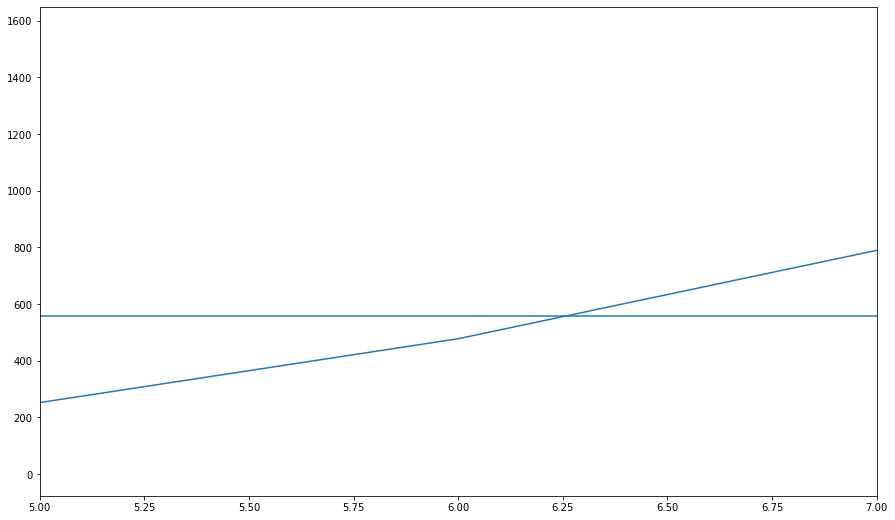

In [259]:
plt.plot(error('red_asteroid/reduced_UCD_0222.fits', p1coords[0]))
plt.axhline(y = 557)
plt.xlim((5,7))

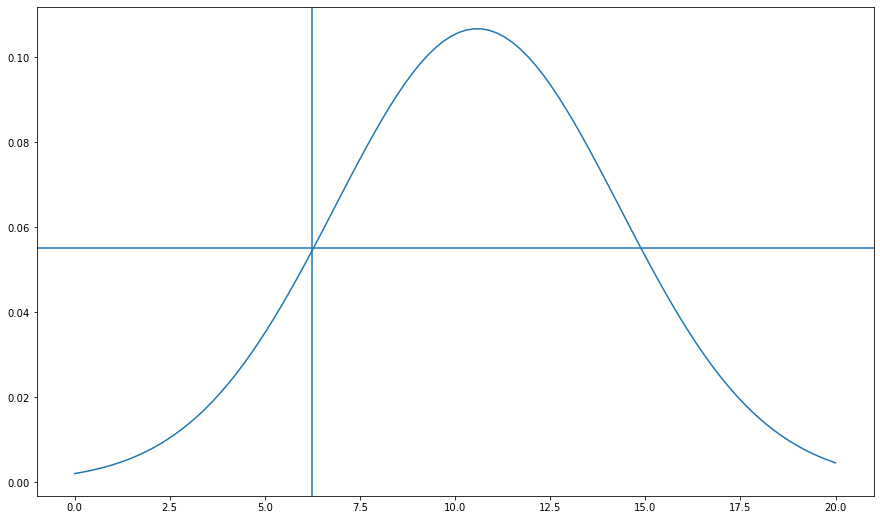

In [262]:

myfile = pf.getdata('red_asteroid/reduced_UCD_0222.fits')
positions = p1coords[0]
        
y = np.array(myfile[int(positions[1]), int(positions[0])-10:int(positions[0])+10])
x = np.linspace(0,len(y),len(y))
        
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])
xt = np.linspace(0, len(y), len(y))
ynew = Gauss(xt,*popt)

x = np.linspace(0,20,100)
pdf = norm.pdf(x, mean, sigma)
plt.plot(x, pdf)
plt.axvline(x = 6.25)
plt.axhline(y = 0.055)

1 sigma is roughly 6.25pix = 1.875"
1.875" = 0.0005 deg
after propaggatnig errors this comes out to roughly 0.04